<a href="https://colab.research.google.com/github/Marianaoliveiranalysis/projeto-ecommerce-cosmetics/blob/main/transa%C3%A7%C3%B5es_clientes_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/transacoes_clientes.csv')
print(df)

    cliente   categoria  valor forma_pagamento data_transacao  cidade  \
0      C082       Sérum  22.53          Cartão     2025-07-01   Braga   
1      C035    Sabonete  54.87          Boleto     2025-06-05  Lisboa   
2      C024      Tônico  45.05          PayPal     2025-06-05  Lisboa   
3      C047  Hidratante  20.80          PayPal     2025-06-25  Lisboa   
4      C084       Sérum  46.05             Pix     2025-06-24   Braga   
..      ...         ...    ...             ...            ...     ...   
195    C039    Protetor  60.90             Pix     2025-06-11   Braga   
196    C065      Tônico  57.44          Boleto     2025-06-02    Faro   
197    C040  Hidratante  27.13          Cartão     2025-06-12    Faro   
198    C059  Hidratante  36.45          Boleto     2025-06-07  Lisboa   
199    C049    Protetor  33.31          Boleto     2025-06-02    Faro   

     score_satisfacao  cashback       status  
0                   5      2.73     entregue  
1                   4      3.

In [ ]:
#Entender melhor o dataframe
df.info()
df.describe(include= 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cliente           200 non-null    object 
 1   categoria         200 non-null    object 
 2   valor             200 non-null    float64
 3   forma_pagamento   200 non-null    object 
 4   data_transacao    200 non-null    object 
 5   cidade            200 non-null    object 
 6   score_satisfacao  200 non-null    int64  
 7   cashback          200 non-null    float64
 8   status            200 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 14.2+ KB


,cliente,categoria,valor,forma_pagamento,data_transacao,cidade,score_satisfacao,cashback,status
count,200,200,200.000000,200,200,200,200.000000,200.000000,200
unique,84,5,NaN,4,31,5,NaN,NaN,3
top,C075,Hidratante,NaN,Cartão,2025-06-18,Braga,NaN,NaN,entregue
freq,6,43,NaN,58,11,49,NaN,NaN,70
mean,NaN,NaN,48.477450,NaN,NaN,NaN,5.375000,4.905650,NaN
std,NaN,NaN,18.850999,NaN,NaN,NaN,3.188291,2.410074,NaN
min,NaN,NaN,15.850000,NaN,NaN,NaN,0.000000,0.940000,NaN
25%,NaN,NaN,32.060000,NaN,NaN,NaN,3.000000,2.870000,NaN
50%,NaN,NaN,51.500000,NaN,NaN,NaN,5.000000,4.620000,NaN
75%,NaN,NaN,63.022500,NaN,NaN,NaN,8.000000,6.442500,NaN


In [ ]:
# Verificação de valores nulos e duplicatas
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [ ]:
# Limpeza e Padronização dos Dados
#Substituir valores nulos por outra palavra se for object e se for float por um dado numero moda/mediana/ media,
#tirar os espaços, substituir letras maiusculas por miniculas.
#Aqui será caso seja necessário alterar o padrão de datas.
df.dropna(inplace=True)
df.head()

print("Antes:", df.shape)
df.dropna(inplace=True)
print("Depois:", df.shape)



Antes: (200, 13)
Depois: (200, 13)


In [ ]:
# Criação de colunas derivadas
df['data_transacao'] = pd.to_datetime(df['data_transacao'], errors='coerce')
df['mes'] = df['data_transacao'].dt.month
df['mes_nome'] = df['mes'].map(meses)

df['ano'] = df['data_transacao'].dt.year


df['faixa_valor'] = np.where(df['valor'] < 10, 'Baixo',
                             np.where(df['valor'] < 50, 'Médio', 'Alto'))

df.head(10)


,cliente,categoria,valor,forma_pagamento,data_transacao,cidade,score_satisfacao,cashback,status,mes,mes_nome,ano,faixa_valor
0,C082,Sérum,22.53,Cartão,2025-07-01,Braga,5,2.73,entregue,7,Julho,2025,Médio
1,C035,Sabonete,54.87,Boleto,2025-06-05,Lisboa,4,3.53,em trânsito,6,Junho,2025,Alto
2,C024,Tônico,45.05,PayPal,2025-06-05,Lisboa,9,2.30,entregue,6,Junho,2025,Médio
3,C047,Hidratante,20.80,PayPal,2025-06-25,Lisboa,7,2.43,entregue,6,Junho,2025,Médio
4,C084,Sérum,46.05,Pix,2025-06-24,Braga,7,3.89,em trânsito,6,Junho,2025,Médio
5,C028,Tônico,73.21,Boleto,2025-06-10,Porto,5,5.50,entregue,6,Junho,2025,Alto
6,C003,Sérum,49.34,Boleto,2025-06-13,Braga,3,6.92,cancelado,6,Junho,2025,Médio
7,C012,Sabonete,58.89,Cartão,2025-06-10,Porto,8,4.86,em trânsito,6,Junho,2025,Alto
8,C093,Tônico,52.98,PayPal,2025-06-29,Braga,3,4.25,em trânsito,6,Junho,2025,Alto
9,C048,Hidratante,31.72,PayPal,2025-06-19,Braga,6,1.66,cancelado,6,Junho,2025,Médio


In [ ]:
#Visualização final e salvamento
df.to_csv('transacoes_clientes_tratado.csv', index=False)

In [ ]:
# Exploração com filtros e agrupamentos
#total gasto por categoria
df.groupby('categoria')['valor'].sum().sort_values(ascending=False)


,valor
categoria,
Hidratante,2191.65
Sérum,2137.71
Tônico,2026.34
Sabonete,1805.74
Protetor,1534.05


In [ ]:
df.groupby('forma_pagamento')['valor'].mean()

,valor
forma_pagamento,
Boleto,48.196667
Cartão,47.420517
PayPal,51.693636
Pix,47.075532


In [ ]:
# Filtro por status cancelado
df[df['status'] == 'cancelado']

,cliente,categoria,valor,forma_pagamento,data_transacao,cidade,score_satisfacao,cashback,status,mes,mes_nome,ano,faixa_valor
6,C003,Sérum,49.34,Boleto,2025-06-13,Braga,3,6.92,cancelado,6,Junho,2025,Médio
9,C048,Hidratante,31.72,PayPal,2025-06-19,Braga,6,1.66,cancelado,6,Junho,2025,Médio
10,C066,Protetor,47.28,Pix,2025-06-24,Porto,5,6.10,cancelado,6,Junho,2025,Médio
14,C008,Tônico,64.29,Boleto,2025-06-20,Coimbra,1,5.51,cancelado,6,Junho,2025,Alto
16,C033,Hidratante,65.05,Cartão,2025-06-28,Porto,2,6.65,cancelado,6,Junho,2025,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,C076,Sérum,62.54,Cartão,2025-06-07,Faro,5,6.45,cancelado,6,Junho,2025,Alto
192,C004,Protetor,31.69,Pix,2025-06-13,Braga,3,2.31,cancelado,6,Junho,2025,Médio
194,C075,Sérum,34.88,PayPal,2025-06-04,Coimbra,2,3.09,cancelado,6,Junho,2025,Médio
195,C039,Protetor,60.90,Pix,2025-06-11,Braga,0,7.58,cancelado,6,Junho,2025,Alto


In [ ]:
# Estatística Descritivas
df.describe()


,valor,data_transacao,score_satisfacao,cashback,mes,ano
count,200.000000,200,200.000000,200.000000,200.000000,200.0
mean,48.477450,2025-06-16 01:26:24,5.375000,4.905650,6.050000,2025.0
min,15.850000,2025-06-01 00:00:00,0.000000,0.940000,6.000000,2025.0
25%,32.060000,2025-06-08 00:00:00,3.000000,2.870000,6.000000,2025.0
50%,51.500000,2025-06-16 00:00:00,5.000000,4.620000,6.000000,2025.0
75%,63.022500,2025-06-24 00:00:00,8.000000,6.442500,6.000000,2025.0
max,79.980000,2025-07-01 00:00:00,10.000000,10.920000,7.000000,2025.0
std,18.850999,NaN,3.188291,2.410074,0.218492,0.0


In [ ]:
# Média e Mediana por cidade
df.groupby('cidade')['valor'].agg(['mean', 'median'])

,mean,median
cidade,,
Braga,49.976327,52.100
Coimbra,48.666897,53.250
Faro,48.651842,53.475
Lisboa,46.194615,47.980
Porto,48.554444,49.400


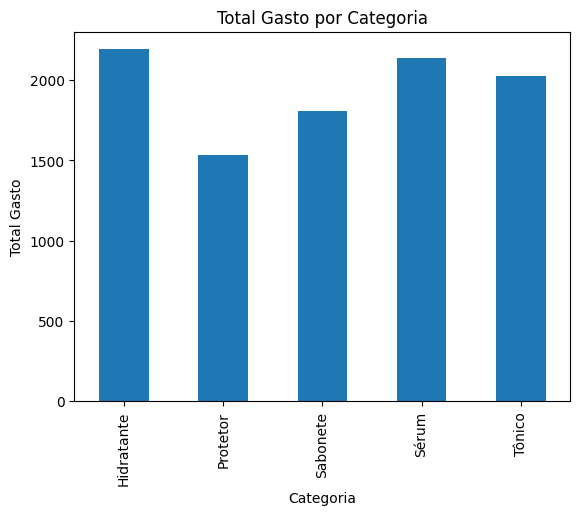

In [ ]:
#Visualização de Dados
# Gráfico de Barras: total gasto por categoria
df.groupby('categoria')['valor'].sum().plot(kind='bar')
plt.title('Total Gasto por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Total Gasto')
plt.show()



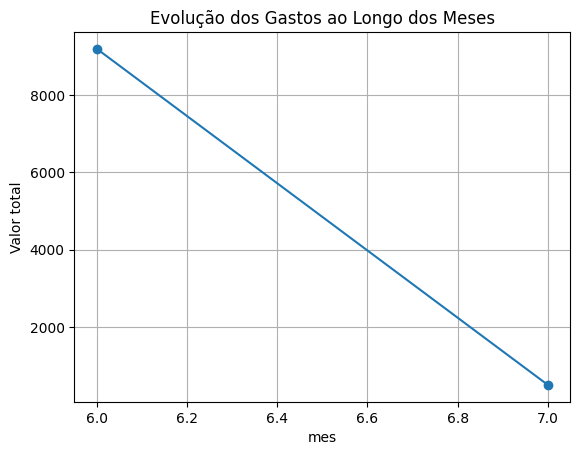

In [ ]:
# Gáfico de Linhas : Gastos ao longo dos meses
df.groupby('mes')['valor'].sum().plot(marker= 'o')
plt.title('Evolução dos Gastos ao Longo dos Meses')
plt.xlabel('mes')
plt.ylabel('Valor total')
plt.grid(True)
plt.show()

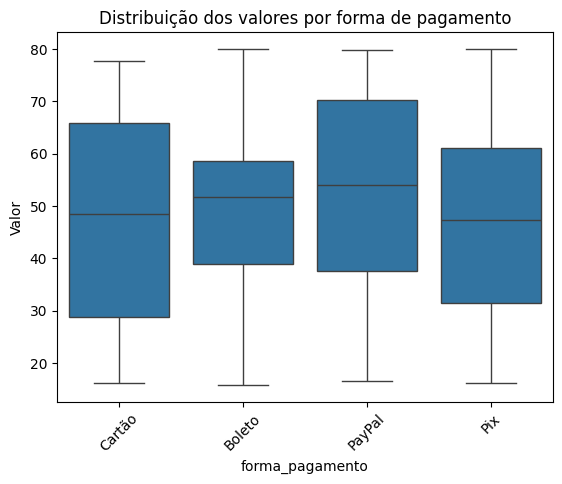

In [ ]:
# Gráfico BoxPlot: Valor por forma de pagamento
sns.boxplot(x='forma_pagamento', y='valor', data=df)
plt.title('Distribuição dos valores por forma de pagamento')
plt.xticks(rotation=45)
plt.ylabel('Valor')
plt.show()

In [ ]:
# Storytelling com Dados
categoria_top= df.groupby('categoria')['valor'].sum().idxmax()
mes_top=df.groupby('mes')['valor'].sum().idxmax()


print(f'A categoria com o maior gasto é: {categoria_top}')
print(f'O mês com o maior gasto é: {mes_top}')



A categoria com o maior gasto é: Hidratante
O mês com o maior gasto é: 6


In [ ]:
df.describe(include= 'all')

,cliente,categoria,valor,forma_pagamento,data_transacao,cidade,score_satisfacao,cashback,status,mes,mes_nome,ano,faixa_valor
count,200,200,200.000000,200,200,200,200.000000,200.000000,200,200.000000,200,200.0,200
unique,84,5,NaN,4,NaN,5,NaN,NaN,3,NaN,2,NaN,2
top,C075,Hidratante,NaN,Cartão,NaN,Braga,NaN,NaN,entregue,NaN,Junho,NaN,Alto
freq,6,43,NaN,58,NaN,49,NaN,NaN,70,NaN,190,NaN,102
mean,NaN,NaN,48.477450,NaN,2025-06-16 01:26:24,NaN,5.375000,4.905650,NaN,6.050000,NaN,2025.0,NaN
min,NaN,NaN,15.850000,NaN,2025-06-01 00:00:00,NaN,0.000000,0.940000,NaN,6.000000,NaN,2025.0,NaN
25%,NaN,NaN,32.060000,NaN,2025-06-08 00:00:00,NaN,3.000000,2.870000,NaN,6.000000,NaN,2025.0,NaN
50%,NaN,NaN,51.500000,NaN,2025-06-16 00:00:00,NaN,5.000000,4.620000,NaN,6.000000,NaN,2025.0,NaN
75%,NaN,NaN,63.022500,NaN,2025-06-24 00:00:00,NaN,8.000000,6.442500,NaN,6.000000,NaN,2025.0,NaN
max,NaN,NaN,79.980000,NaN,2025-07-01 00:00:00,NaN,10.000000,10.920000,NaN,7.000000,NaN,2025.0,NaN


In [ ]:
from google.colab import files
files.download('transacoes_clientes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>